<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Classification_Decision_Boundary_Function/blob/main/Plot_Decision_Boundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The below is the function to plot decision boundaries for a classification problem

In [8]:
# Import dependencies
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
# The toy dataset
from sklearn.datasets import make_circles # a toy dataset for clustering and classification according to documentation

# lets make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42) # noise = 0.03 mean 3% of noisy data  

In [2]:
# Lets check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# labels
y[:10] # Lets just check first 10

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# Lets visualize in a table form
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y}) # X0 is column 0, X1 is column 1 and label is the last
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


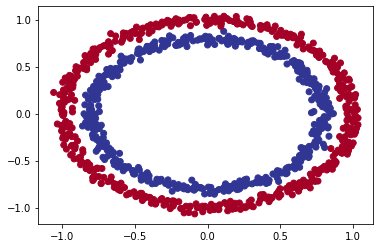

In [5]:
# Now lets visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c = y, cmap = plt.cm.RdYlBu) # Red blue colour for our X0, X1
# first axis would have X0, second would have X1 with all data

# The plot_boundary_function





In [11]:
# Lets code what we said above
# Function for that
import numpy as np
import matplotlib.pyplot as plt

  # Plots the decision boundary created by a model predicting on X.
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
 x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
 y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  # This are just the boundaries, the lowest and the highest

  # Read about numpy meshgrids to know more

 xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we are going to make predictions on these)
 x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
 y_pred = model.predict(x_in)

  # Check for multi-class
 if len(y_pred[0]) > 1:
    print("It is multiclass")
    # We will have to reshape our prediction to get them ready for plot
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape) #
 else:
    print("It is binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the boundary
 plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
 plt.scatter(X[:, 0], X[:,1], c= y, cmap = plt.cm.RdYlBu)
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())

In [6]:
# We can split either by indexing or using Sklearn, but I will use Sklearn here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

''' random_state : Controls the shuffling applied to the data before applying the split. 
Pass an int for reproducible output across multiple function calls.
And 0.2 is just 20% test set'''

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [9]:
# Now lets recreate our efficient model to fit on train set and predict on test
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(4, activation = "relu"),
      tf.keras.layers.Dense(4, activation = "relu"),
      tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["accuracy"])

# 3. Fitting the model
history = model.fit(X_train, y_train, epochs = 303, verbose = 0)

# How to plot using the plot_decision_boundary function and matplotlib

It is binary
It is binary


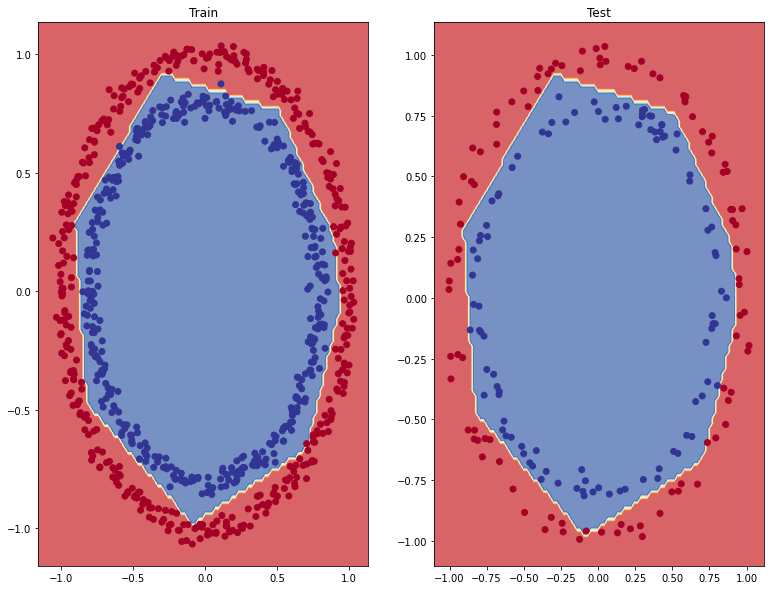

In [12]:
# Now lets plot the decision boundaries for the training and test sets

''' Plots the decision boundary on the training set''' # this set is not mathematical set, i.e. duplicates allowed
plt.figure(figsize = (13, 10))
plt.subplot(1, 2, 1) # 1 row 2 columns and 1st value is the train
plt.title("Train")
plot_decision_boundary(model, X_train, y_train) # Our plot boundary function

'''Plots the decision boundary on the test set'''
plt.subplot(1, 2, 2) # 1 row 2 column, and the 2nd value
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
